In [ ]:
#선형 회귀 기반
#분류 - 로지스틱 회귀
#회귀 - 선형회귀 릿지 라쏘

# 로지스틱 회귀 (LogisticRegression)
- 선형회귀 알고리즘을 이용한 이진 분류 모델
- (회귀의 결과를 로지스틱 함수에 넣어서 양성일 확률로 바꿈)
- Sample이 특정 클래스에 속할 확률을 추정한다.    
    

## 확률 추정
- 선형회귀 처럼 입력 특성(Feature)에 가중치 합을 계산한 값을 로지스틱 함수를 적용해 확률을 계산한다.


$$
\hat{p} = \sigma \left( \mathbf{w}^{T} \cdot \mathbf{X} + \mathbf{b} \right)\\
\hat{p}:\: positive의\,확률,\quad \sigma():\:logistic\,함수,\quad \mathbf{w}:\:weight,\quad \mathbf{X}:\:input feature,\quad \mathbf{b}:\:bias
$$

### 로지스틱 함수 (시그모이드 함수의 한 종류)
- 0과 1사이의 실수를 반환한다.
- S 자 형태의 결과를 내는 **시그모이드 함수(sigmoid function)** 이다.

$$
\sigma(x) = \frac{1}{1 + \mathbf{e}^{-x}}
$$

- 샘플 **x**가 양성에 속할 확률

$$
\hat{y} = \begin{cases} 0\quad\hat{p}<0.5\\1\quad\hat{p}\geqq0.5 \end{cases}
$$

##### logistic 함수 시각화

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def logistic_func(X):
    return 1 / (1 + np.exp(-X))  

X = np.linspace(-10, 10, 1000) #-10부터 10까지 1000개
y = logistic_func(X) #1000개 값에 대해 로지스틱 함수 계산

In [2]:
y.min(), y.max()

(4.5397868702434395e-05, 0.9999546021312976)

In [ ]:
#spine (축 선) :

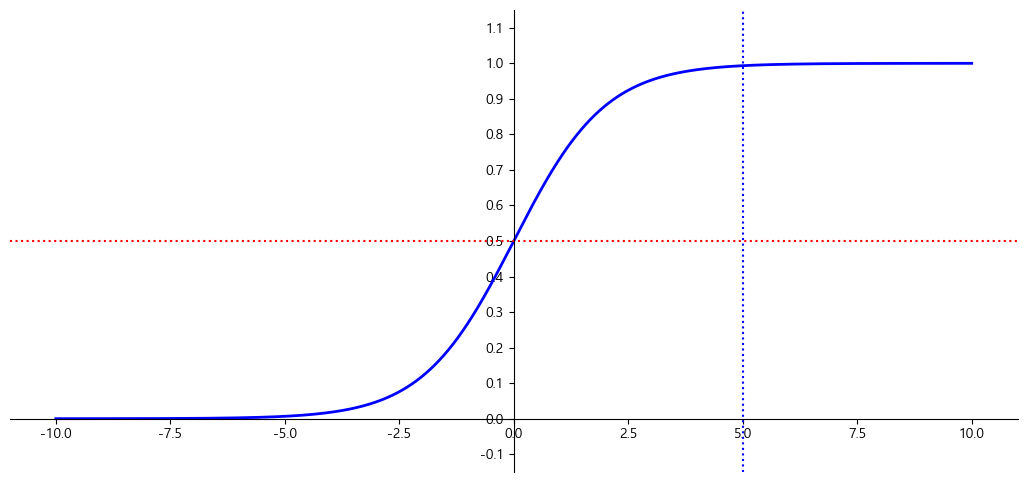

In [11]:
plt.figure(figsize=(13, 6))

plt.plot(X, y, color='b', linewidth=2)

plt.axhline(y=0.5, color='r', linestyle=':') #가로 줄 그어주기 #세로줄 그어주기 : v
plt.axvline(x=5, color='b', linestyle=':')

plt.ylim(-0.15, 1.15)
plt.yticks(np.arange(-0.1,1.2,0.1))

ax = plt.gca() #그래프 그리는 서브플롯 받아오기
ax.spines['left'].set_position("center") #왼쪽 스파인을 가운데 놔라
ax.spines['bottom'].set_position(('data', 0.0)) #아래 스파인
# ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [ ]:
np.min(y), np.max(y)

## LogisticRegression의 손실 함수(Loss Function)
- **Cross Entropy(로그손실-log loss)**
    - 모델이 예측한 정답의 확률에 대해 log를 취해 손실값을 구한다.
        - 확률이 틀리면 틀릴 수록 손실값을 크게 만들기 위해서 log를 취한다.


$$
\log{\left(모델이\,예측한\,정답에\,대한\,확률\right)}
$$


- **Binary Cross Entropy**
    - Logistic 함수를 이용한 추론 결과에 대한 cross entropy 계산
        - Logistic함수은 positive(1)의 확률만 추출하므로 정답이 0일때, 1일때 계산하는 것이 다르다. 그것을 하나의 공식으로 정의한 것이 binary cross entropy이다.
$$
L(\mathbf{W}) = - \frac{1}{m} \sum_{i=1}^{m}{\left[ y_{i} \log{\left( \hat{p}_i \right)} + \left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)} \right]}\\
y:\:실제값(정답),\quad\hat{p}:\:예측확률(양성확률)
$$

- y(실제값) 이 1인 경우 $y_{i}\log{\left(\hat{p}_i\right)}$ 이 손실을 계산
- y가 0인 경우 $\left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)}$이 손실을 계산
- $\hat{p}$(예측확률)이 클수록 반환값은 작아지고 작을 수록 값이 커진다. 

> - **Loss Function**
>   - 모델이 예측한 값과 정답간의 차이(오차, loss)를 구하는 함수.
>   - 모델의 파라미터를 최적화할 때 loss를 최소화하는 것을 목적으로 한다.
> 

In [ ]:
#모델이 확률로 추정할 때, 
# 0이냐 1이냐의 확률을 0 : 1에 가깝게 예측할수록(ex)0.01:0.99) 좋은 모델
# 0.51 : 0.49 보단 1 : 0

In [ ]:
#오차:확률로 계산 
#1:0을 0:1로 예측했다면 오차는 1(최댓값)/ 정답일 때는 오차는 0
#오차가 너무 작다!!!!!!!! 밑이 e인 log에 넣장!!!!!!!!!!!!!!

In [18]:
import numpy as np
#모델이 추정한 정답 확률
print("완벽 정답:", np.log(1.0)) #e**0 =1
print("완벽 오답:", -np.log(0.0000000000000000000001)) #많이 틀릴수록 오차를 더 크게

완벽 정답: 0.0
완벽 오답: 50.65687204586901


In [19]:
X = np.linspace(0.0000000000000001,1,1000)
y = np.log(X)

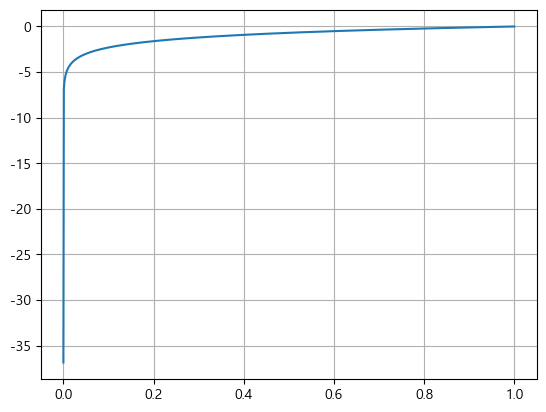

In [21]:
import matplotlib.pyplot as plt
plt.plot(X,y)
plt.grid(True)
plt.show()

In [25]:
np.log(0.51), np.log(0.7), np.log(0.99) #간신히 맞춘 경우, 어느정도 맞춘 경우, 믾이 맞춘 경우

(-0.6733445532637656, -0.35667494393873245, -0.01005033585350145)

In [24]:
np.log(0.49), np.log(0.00000000000000000000000000000000000000000000000000000001)
#간신히 정답이 아닌 경우, 거의 정확히 정답이 아니라고 예측하는 경우

(-0.7133498878774648, -128.94476520766656)

In [ ]:
# 정답이 0일 확률 0.8 / 정답이 1일 확률 0.2 
# 모델이 추정한 것 = 양성의 확률 -> 정답이 양성일 때 : 로그(모델이 추정한 확률)
#                            -> 정답이 음성일 때 : 로그(1-(모델이 추정한 확률))
# 정답 * log(모델추정값) + (1-정답) * log(1-(모델추정값))
# :if 정답 = 1 -> 앞에 항이 계산됨
# :if 정답 = 0 -> 뒤에 항이 계산됨

In [ ]:
# ex) 0,1,2 -> 정답 1,0,0 -> 모델이 예측한 확률 : 0.3, 0.2, 0.5 
# 정답인 값에는 1을 곱해줌 1 * log(0.3) + 0 * log(0.2) + 0 * log(0.5)


In [ ]:
#손실함수 : '학습 중에 알고리즘이 얼마나 잘못 예측하는 정도'를 확인하기 위한 함수로써 
#최적화(Optimization)를 위해 최소화하는 것이 목적인 함수

#최적의 w,b찾기
#데이터 양이 많으면 함수 찾는데 시간이 너무 오래 걸림
#함수가 없다면, 모든 w, b 대입하며 찾기 

## 최적화 

### 최적화란
- 모델이 예측한 결과와 정답간의 차이(오차)를 가장 적게 만드는 Parameter를 찾는 과정을 최적화라고 한다.
- 모델의 예측값과 실제 값의 차이를 계산하는 함수를 만들고 그 값이 최소가 되는 지점을 찾는 작업을 한다.

### 목적함수(Object Function), 손실함수(Loss Function), 비용함수(Cost Function), 오차함수(Error Function)
- 모델의 예측한 값과 실제값 사이의 차이를 정의하는 함수로 모델이 학습할 때 사용된다.
- 이 함수의 반환값(Loss)을 최소화 하는 파라미터을 찾는 것이 최적화의 목적
- 해결하려는 문제에 맞춰 Loss 함수를 정의한다.
    - Classification(분류)의 경우 cross entropy(log loss)를 사용한다.
    - Regression(회귀)의 경우 MSE(Mean Squared Error)를 사용한다.

### LogisticRegression의 최적화
- 분류 문제이므로 Cross entropy(Log loss함수)를 손실함수로 사용한다.
- Cross entropy는 loss의 최소값으로 하는 parameter 찾는 방정식이 없기 때문에 **LogisticRegression은 경사하강법을 이용해 최적화를 진행한다.**
- 로그 손실을 $\mathbf{W}$로 미분하면 다음과 같다.
    - 아래 도함수로 기울기를 구해 기울기가 0이 될 때 까지 W(가중치)들을 update한다.
$$
\frac{\partial}{\partial w_j}L(W) = \frac{1}{m} \sum_{i=1}^{m}{\left( \sigma \left( \mathbf{W}^{T} \cdot \mathbf{x}_i \right) - \mathbf{y}_i \right)} x_{ij}
$$

## LogisticRegression 주요 하이퍼파라미터
- penalty: 과적합을 줄이기 위한 규제방식
    - 'l1', 'l2'(기본값), 'elasticnet', 'none' 
- C: 규제강도(기본값 1) - 작을 수록 규제가 강하다(단순).
- max_iter(기본값 100) : 경사하강법 반복횟수

## 예제

##### 데이터 전처리
- LogisticRegression은 선형회귀 기반의 알고리즘이므로 연속형 Feature는 Feature scaling, 범주형 Feature는 One hot encoding 처리를 한다.

In [26]:
#2023.05.26 복습
#선형회귀 모델 - X -> Y 
#            - input(attribute,속성,feature,독립변수) -> output(target,label,종속변수)
#            - target을 결정하는 feature들의 각각의 가중치(w)를 고려한 모델 
#            - w의 부호(음수, 양수) : 비례, 반비례 관계 표현
#            - w의 크기(절댓값) : 0에 가까울수록 target에 미치는 영향력이 적다는 의미 
#            - 스케일링해야 성능 잘 나옴
#linearregression으로 각각의 가중치와 편향(b) 알아낼 수 있다.
#다항회귀 - 선형회귀 모델로 underfitting 발생 시 feature 늘려줌 비선형인 구분 가능해짐. x, x**2...
#        - 적당히.
#규제 : 오버피팅 발생 시 사용, 가중치(중요도, w)를 0에 가까운 값으로 조정 ex) 11 -> 9
#손실함수(오차를 줄이는 함수)- w이 클수록 오차가 커진다.
#    - ridge : 제곱, 알파 크게 할수록 규제
#    - lasso : 절댓값, 알파 크게 하면 가중치가 0이 되어버림, 모든 feature의 가중치가 0이 될 수도 

#로지스틱 회귀 : 선형회귀의 분류 모델 (선형회귀모델의 결과를 로지스틱 함수에 적용한 값(확률값))
#            - 이진분류 모델
#로지스틱 함수 : 시그모이드 함수의 일종 (s자형 그래프)
#            - 0 ~ 1 사이의 실수 반환
#log loss : 분류문제에서 많이 사용하는 손싫 함수  
#         - log(모델이 예측한 정답에 대한 확률)
#         - 확률의 오차가 0 ~ 1 사이 값으로 '작아 보이는 것'을 로그를 씌워서 극대화시켜줌. 
#binary cross entropy : 정답 * log(모델추정값) + (1-정답) * log(1-(모델추정값))
#                     if) 정답 = 1 -> 앞에 항이 계산됨
#                     if) 정답 = 0 -> 뒤에 항이 계산됨

#최적화 : 손실함수를 이용해서 최적화 - 경사하강법 사용